In [1]:
import skimage
import numpy as np
from skimage import img_as_ubyte
import cv2

In [1]:
import cv2
def cropping_helper(image_path, target_size):
    # Load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges= cv2.Canny(gray, 10,255)
    contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour = sorted(contours, key=cv2.contourArea, reverse= True)[0]
    
    x,y,w,h= cv2.boundingRect(sorted_contour)
    i=100
    cropped_contour= image[y:y+h, x:x+w]
    image_name= "output_shape_number_" + str(i) + ".jpg"
    cv2.imwrite(image_name, cropped_contour)
    readimage= cv2.imread(image_name)
    cv2.imshow('Image', readimage)
    cv2.waitKey(0)
        
    cv2.destroyAllWindows()
        

cropping_helper("lego_objects/1735.jpg", 256)

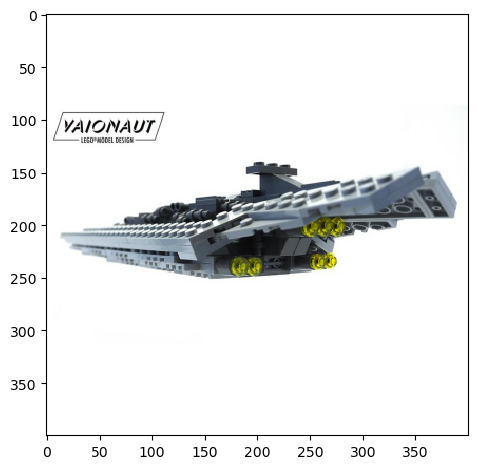

In [2]:
def preprocess_image(image_path, target_size):
    image = skimage.io.imread(image_path)

    if image.shape[0] != image.shape[1]:
        diff = abs(image.shape[0] - image.shape[1])
        padding = [(0, 0), (0, 0), (0, 0)]
        if image.shape[0] > image.shape[1]:
            padding[1] = (diff // 2, diff - (diff // 2))
        else:
            padding[0] = (diff // 2, diff - (diff // 2))
        image = np.pad(image, padding, mode='constant', constant_values=255)

    image = skimage.transform.resize(image, (target_size, target_size))
    skimage.io.imshow(image)
    #return image

preprocess_image("lego_objects/5.jpg", 400)